In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def scatterplot_custom(df: pd.DataFrame, 
                    path_to_save: str,
                    event_names: list[str] = ['First', 'Second'],
                    xlim: tuple[float, float] = (-0.05, 1.35),
                    ylim : tuple[float, float] = (-0.05, 1.35),
                    small_fontsize: int = 14, 
                    medium_fontsize: int = 18,
                    large_fontsize: int = 20,
                    measure_name: str = ""):
    values1 = df[event_names[0]].values
    values2 = df[event_names[1]].values

    # make a scatterplot from the dataframe df, where on the x axis you have left, on the y you have right
    # and the color is determined by the test name
    # make a list of markers
    markers = ["o", "+"]

    # set seaborn style
    sns.set_style("darkgrid")

    # # set latex font
    plt.rcParams["mathtext.fontset"] = "stix"
    plt.rcParams["font.family"] = "STIXGeneral"

    # increase font size
    plt.rc('font', size=small_fontsize)          # controls default text sizes
    plt.rc('axes', titlesize=medium_fontsize)     # fontsize of the axes title
    plt.rc('axes', labelsize=large_fontsize)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=small_fontsize)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=small_fontsize)    # fontsize of the tick labels
    plt.rc('legend', fontsize=medium_fontsize)    # legend fontsize
    plt.rc('figure', titlesize=large_fontsize)  # fontsize of the figure title
    plt.rcParams.update({"font.size": medium_fontsize})

    # get a color palette
    palette = sns.color_palette("colorblind", n_colors=len(df))

    fig, axs = plt.subplots(
        2,
        2,
        figsize=(7, 5),
        gridspec_kw={"height_ratios": [10, 1], "width_ratios": [1, 10]},
    )
    plt.tight_layout()

    sns.scatterplot(
        data=df,
        x=event_names[0],
        y=event_names[1],
        label="",
        marker=markers[0],
        s=50,
        alpha=0.6,
        color=palette[0],
        ax=axs[0, 1],
    )

    axs[1, 0].axis("off")

    sns.kdeplot(
        x=values1,
        bw_method=0.5,
        color='black',
        fill=True,
        linewidth=1,
        ax=axs[1, 1],
    )
    sns.rugplot(
        x=values1,
        height=0.22,
        color="black",
        alpha=0.2,
        linewidth=2,
        ax=axs[1, 1],
    )
    axs[1, 1].set_xlabel(f"{measure_name}, {event_names[0]}")
    axs[0, 1].set_xlim(*xlim)
    axs[1, 1].set_xlim(*xlim)
    axs[0, 1].set_xticklabels([])
    axs[1, 1].set_yticklabels([])
    axs[0, 1].set_yticklabels([])
    axs[0, 1].set_ylabel(None)
    axs[1, 1].set_ylabel(None)

    axs[0, 0].invert_xaxis()
    axs[1, 1].invert_yaxis()
    sns.kdeplot(
        y=values2,
        bw_method=0.5,
        color='black',
        fill=True,
        linewidth=1,
        ax=axs[0, 0],
    )
    sns.rugplot(
        y=values2,
        height=0.22,
        color="black",
        alpha=0.2,
        linewidth=2,
        ax=axs[0, 0],
    )
    axs[0, 0].set_ylabel(f"{measure_name}, {event_names[1]}")
    axs[0, 1].set_ylim(*ylim)
    axs[0, 0].set_ylim(*ylim)
    axs[0, 0].set_xlabel(None)
    axs[0, 0].set_xticklabels([])


    axs[0, 1].grid(False)
    # axs[0, 1].set_title("Average Dynamic Time Warping Distance")
    plt.subplots_adjust(wspace=0.04, hspace=0.04)

    for ax in axs:
        for ax2 in ax:
            ax2.set_anchor("W")
            
    axs[0,1].grid(True)
    plt.savefig(path_to_save, bbox_inches="tight")
    plt.show()
    



# USILaughs

In [18]:
from json import loads

path_to_data: str = "../data.nosync/usilaughs/results/stationarity_checks_bilateral.json"
with open(path_to_data, "r") as f:
    data = loads(f.read())

In [19]:
import matplotlib.pyplot as plt
# set plt font to latex
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

In [20]:
data.keys()

dict_keys(['ADF', 'DFGLS', 'KPSS', 'PhillipsPerron', 'ZivotAndrews', 'VarianceRatio'])

In [21]:
import numpy as np


adf = {
    side: np.array(
        [
            experiment_data
            for user_data in data["ADF"][side].values()
            for experiment_data in user_data.values()
        ]
    )
    for side in data["ADF"].keys()
}

kpss = {
    side: np.array(
        [
            experiment_data
            for user_data in data["KPSS"][side].values()
            for experiment_data in user_data.values()
        ]
    )
    for side in data["KPSS"].keys()
}

ZivotAndrews = {
    side: np.array(
        [
            experiment_data
            for user_data in data["ZivotAndrews"][side].values()
            for experiment_data in user_data.values()
        ]
    )
    for side in data["ZivotAndrews"].keys()
}

dfgls = {
    side: np.array(
        [
            experiment_data
            for user_data in data["DFGLS"][side].values()
            for experiment_data in user_data.values()
        ]
    )
    for side in data["DFGLS"].keys()
}

varianceratio = {
    side: np.array(
        [
            experiment_data
            for user_data in data["VarianceRatio"][side].values()
            for experiment_data in user_data.values()
        ]
    )
    for side in data["VarianceRatio"].keys()
}

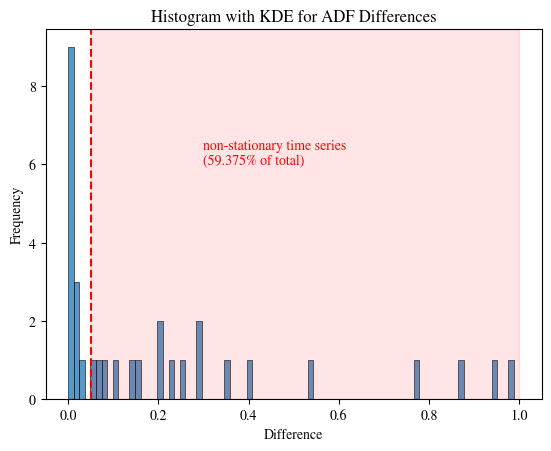

In [22]:
sns.histplot(adf['diff'], bins=80)
plt.xlabel('Difference')
plt.ylabel('Frequency')
# add a vertical line at 0.05
plt.axvline(x=0.05, color='r', linestyle='--')
# add a color block above 0.05
plt.axvspan(0.05, 1, color='red', alpha=0.1)
# add a red text on top of the block saying "non-stationry time series"
plt.text(0.3, 6, f'non-stationary time series\n({np.mean(adf["diff"] > 0.05)*100}% of total)', color='red')
plt.title('Histogram with KDE for ADF Differences')
plt.show()

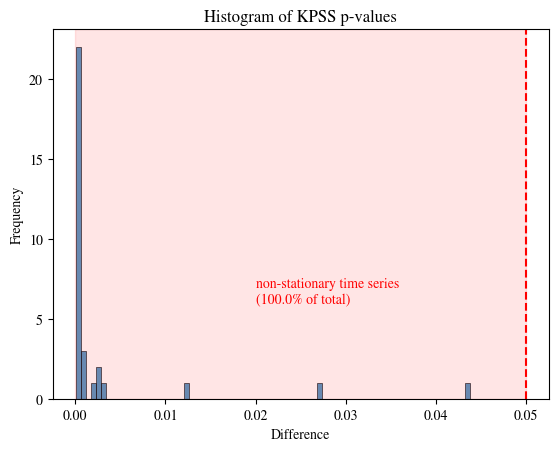

In [ ]:
sns.histplot(kpss["diff"], bins=80)
plt.xlabel("Difference")
plt.ylabel("Frequency")
# add a vertical line at 0.05
plt.axvline(x=0.05, color="r", linestyle="--")
# print the number of values below 0.05 as percentage
# add a color block above 0.05
plt.axvspan(0, 0.05, color="red", alpha=0.1)
# add a red text on top of the block saying "non-stationry time series"
plt.text(
    0.02,
    6,
    f'non-stationary time series\n({np.mean(kpss["diff"] < 0.05)*100}% of total)',
    color="red",
)
plt.title("Histogram of KPSS p-values")
plt.savefig("../final_visualizations/kpss_hist_usilaughs.pdf", bbox_inches="tight") 
plt.show()

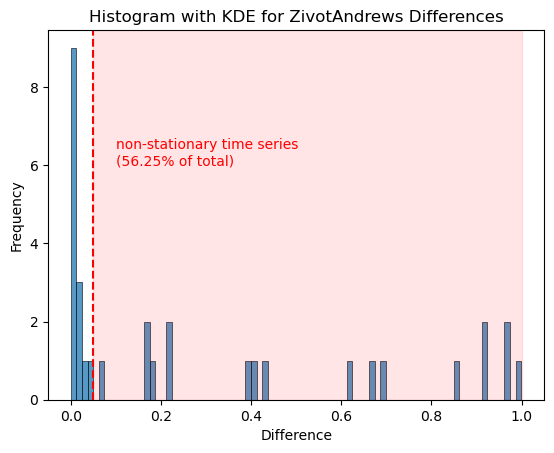

In [69]:
sns.histplot(ZivotAndrews["diff"], bins=80)
plt.xlabel("Difference")
plt.ylabel("Frequency")
# add a vertical line at 0.05
plt.axvline(x=0.05, color="r", linestyle="--")
# print the number of values below 0.05 as percentage
# add a color block above 0.05
plt.axvspan(0.05, 1, color="red", alpha=0.1)
# add a red text on top of the block saying "non-stationry time series"
plt.text(
    0.1,
    6,
    f'non-stationary time series\n({np.mean(ZivotAndrews["diff"] > 0.05)*100}% of total)',
    color="red",
)
plt.title("Histogram with KDE for ZivotAndrews Differences")
plt.show()

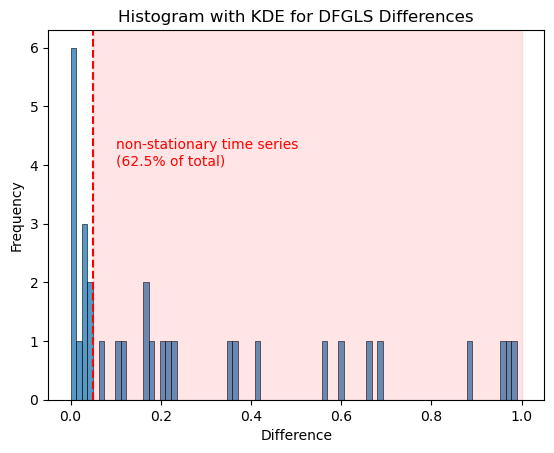

In [72]:
sns.histplot(dfgls["diff"], bins=80)
plt.xlabel("Difference")
plt.ylabel("Frequency")
# add a vertical line at 0.05
plt.axvline(x=0.05, color="r", linestyle="--")
# print the number of values below 0.05 as percentage
# add a color block above 0.05
plt.axvspan(0.05, 1, color="red", alpha=0.1)
# add a red text on top of the block saying "non-stationry time series"
plt.text(
    0.1,
    4,
    f'non-stationary time series\n({np.mean(dfgls["diff"] > 0.05)*100}% of total)',
    color="red",
)
plt.title("Histogram with KDE for DFGLS Differences")
plt.show()

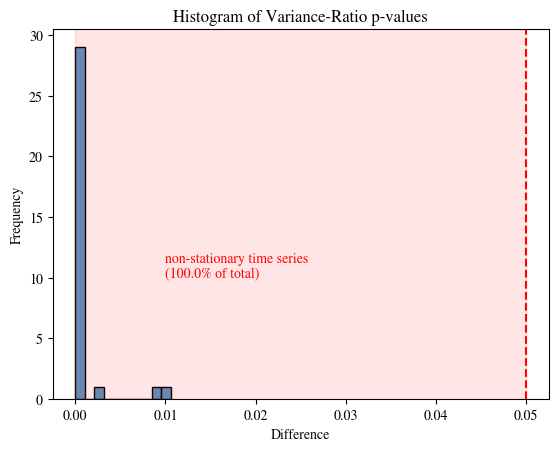

In [ ]:
sns.histplot(varianceratio["diff"], bins=10)
plt.xlabel("Difference")
plt.ylabel("Frequency")
# add a vertical line at 0.05
plt.axvline(x=0.05, color="r", linestyle="--")
# print the number of values below 0.05 as percentage
# add a color block above 0.05
plt.axvspan(0, 0.05, color="red", alpha=0.1)
# add a red text on top of the block saying "non-stationry time series"
plt.text(
    0.01,
    10,
    f'non-stationary time series\n({np.mean(varianceratio["diff"] < 0.05)*100}% of total)',
    color="red",
)
plt.title("Histogram of Variance-Ratio p-values")
plt.savefig("../final_visualizations/variance_ratio_hist_usilaughs.pdf", bbox_inches="tight") 
plt.show()

# MWC2022

In [1]:
from json import loads

path_to_data: str = "../data.nosync/mwc2022/results/stationarity_checks_bilateral.json"
with open(path_to_data, "r") as f:
    data = loads(f.read())

In [2]:
import matplotlib.pyplot as plt
# set plt font to latex
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams["font.family"] = "STIXGeneral"

In [3]:
import numpy as np

kpss = {
    side: np.array(
        [
            experiment_data
            for user_data in data["KPSS"][side].values()
            for experiment_data in user_data.values()
        ]
    )
    for side in data["KPSS"].keys()
}

varianceratio = {
    side: np.array(
        [
            experiment_data
            for user_data in data["VarianceRatio"][side].values()
            for experiment_data in user_data.values()
        ]
    )
    for side in data["VarianceRatio"].keys()
}

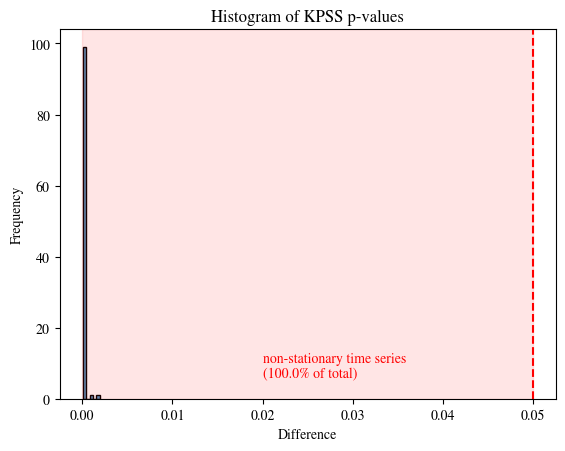

In [10]:
sns.histplot(kpss["diff"], bins=5)
plt.xlabel("Difference")
plt.ylabel("Frequency")
# add a vertical line at 0.05
plt.axvline(x=0.05, color="r", linestyle="--")
# print the number of values below 0.05 as percentage
# add a color block above 0.05
plt.axvspan(0, 0.05, color="red", alpha=0.1)
# add a red text on top of the block saying "non-stationry time series"
plt.text(
    0.02,
    6,
    f'non-stationary time series\n({np.mean(kpss["diff"] < 0.05)*100}% of total)',
    color="red",
)
plt.title("Histogram of KPSS p-values")
plt.savefig("../final_visualizations/kpss_hist_mwc2022.pdf", bbox_inches="tight") 
plt.show()

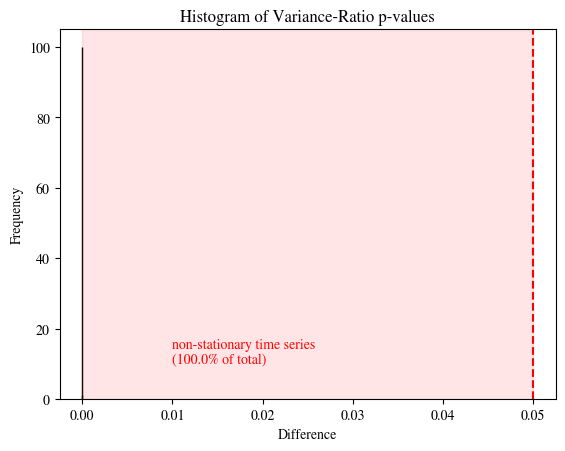

In [14]:
sns.histplot(varianceratio["diff"], bins=5)
plt.xlabel("Difference")
plt.ylabel("Frequency")
# add a vertical line at 0.05
plt.axvline(x=0.05, color="r", linestyle="--")
# print the number of values below 0.05 as percentage
# add a color block above 0.05
plt.axvspan(0, 0.05, color="red", alpha=0.1)
# add a red text on top of the block saying "non-stationry time series"
plt.text(
    0.01,
    10,
    f'non-stationary time series\n({np.mean(varianceratio["diff"] < 0.05)*100}% of total)',
    color="red",
)
plt.title("Histogram of Variance-Ratio p-values")
plt.savefig("../final_visualizations/variance_ratio_hist_mwc2022.pdf", bbox_inches="tight") 
plt.show()